## A Brief Introduction to how Quantum Computer Works

#### Part 1. Why Quantum Computer?

In the previous study, we covered the basic building block of a quantum computer, the transmon, and discovered how it can have two energy levels. For more information on that, please check out my video here on YouTube: 

https://www.youtube.com/watch?v=9MFPvrjHgF0&t=2s&ab_channel=TheGoldennach

You might think this design is similar to a binary bit in our everyday computer, where it has two possible states, on and off, corresponding to numbers 1 and 0. However, different from a binary bit, the transmon can be in a superposition state where there are probabilities for it to be in either of the two energy levels. In other words, we can not say with 100% certainty whether it's 1 or 0. Why do we deal with this kind of superposition state, why not stay with our classical binary bits? One reason is, as our computer gets more and more powerful, the binary bits are shrinking fast to the point that, today, a binary bit has the size of 14nm [1]. Quantum effects are becoming more pronounced. We could either try to suppress these effects, or we can embrace them, and make our computer completely quantum mechanical. 

#### Part 2. What goes on in Quantum Computer?

Let's explore what happens inside a quantum computer. We will first look at the superposition state mentioned earlier. The best way to see it is by example. Here we will make use of the IBM quantum computer, a real quantum computer that everyone can play with!

https://www.ibm.com/quantum-computing/

We will load up the necessary codes, draw a quantum circuit, send it to the IBM quantum computer, and get our measurement results!

In [ ]:
# This is to enable linting, making sure we write our python code in style.
%load_ext pycodestyle_magic
%pycodestyle_on

In [14]:
#import qiskit tools
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise

#import python tool
import matplotlib.pyplot as plt
import numpy as np
import time

from numpy import pi

In [8]:
# Choose a qauntum computer server
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
quito = provider.get_backend('ibmq_manila')
sim = Aer.get_backend('aer_simulator')

ibmqfactory.load_account:WARNING:2021-12-19 17:27:18,712: Credentials are already in use. The existing account in the session will be replaced.


In [15]:
# Draw our quantum circuit
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])


In [10]:
# Send to quantum computer and get counts
tic = time.time()
transpiled_circuits = transpile(circuit, quito)

# Shots represent the number of times a measurement is made
job_real = quito.run(transpiled_circuits, shots=8192)
job_monitor(job_real)
result_real = job_real.result()
toc = time.time()

print(toc-tic)


Job Status: job has successfully run
1187.2253992557526


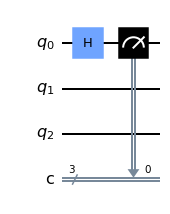

In [17]:
# Visualize the quantum circuit
circuit.draw()

The circuit we have is shown above. It is a very simple circuit. We start with one qubit $q_0$, and it is in a well defined state, $0$. At this point, It might also be worth mentioning a weird thing about a quantum system, that is, if nobody is looking at it, it can be in a superposition, but once someone looks at it (for example measures it), then the superposition collapses and we only have definite states. Going back to the Schrodinger's cat example, nobody knows if the cat is alive or dead until one opens the box, but once we open it, the cat is definitely either alive or dead, it can not be both which is against common sense. We pass this well defined state though what is called a Hadamard gate, it scrambles the state again, and now it is in a superposition of 0 and 1. Generally, a superposition state can be written as:

$\psi_0 = {\alpha}|1> + {\beta}|0>$

Where $\psi_0$ is the wavefunction of $q_0$. $|1>$ and $|0>$ represent the states 1 and 0. $\alpha$ and $\beta$ are complex numbers; the absolute sqaures of them give the probability of finding $q_0$ in a particular state in a measurement.

After passing $q_0$ through the Hadamard gate, there is equal probability of finding $q_0$ in 0 or 1 state, so $\alpha$ and $\beta$ are equal to each other and their absolute sqaures should add up to 1, to preserve the 100% possibilty of finding $q_0$ in some state. So:

$\psi_0 = \frac{1}{\sqrt{2}}|1> + \frac{1}{\sqrt{2}}|0>$

And we expect a 50-50 split in our measurement:


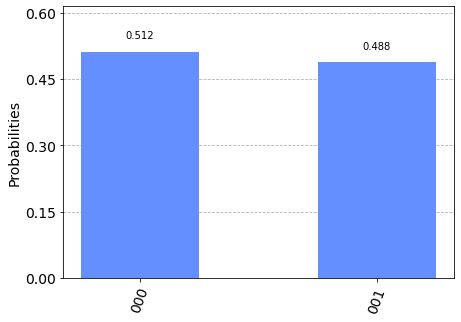

In [13]:
from qiskit.visualization import plot_histogram

counts = result_real.get_counts()
plot_histogram (counts)


It is roughly an even split. Quantum systems are probablistic, so we are not getting the ideal probability of 50% for each outcome. In fact, the randomness in the outcome has its practical applications. We can repeated measure a superposition state in a quantum computer, and ithis will generate a string of randomly generated 0's and 1's, that can be used as encryption keys.[2] The other random number generators not based on quantum mechanics, are in fact based on mathematical algorithm, therefore there are patterns to the numbers generated. Hackers can collect those numbers, analyze the pattern and reverse engineer the random number generator. Quantum random number generator does not suffer from this drawback. So we have our first suprising application of a quantum computer. 

---

A single qubit can be in a state of superposition of 0 and 1. But there are more than one qubit in a quantum computer. And we want to combine these qubits to perform logic operations. In our everyday computers, the binary bits can be combined using logic gates.[3] And in quantum computer, we also have logic gates, one of them is called the CNOT gate. 

The CNOT gate combines two qubits. One of them is designated as control, and the other target. If the control qubit is in state $|0>$, it will not affect the state of the target qubit. If the control qubit is in state $|1>$, then it will flip the state of the target qubit. This is captured in the following truth table:[4]

![Truth Table for CNOT gate](https://github.com/piaohanx/CP1_FinalProject_Piaohan_Xu/blob/main/CNOT2.png?raw=true)

How to build such a quantum logic gate? That is out of the scope of this report. Suffice to say it has been achieved, and exciting new design and research is still ongoing.[5]

Let's have some fun, and combine our qubit in the superposition state with another qubit of a well defined state, through the CNOT gate. The quantum circuit will look like this:

In [21]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])


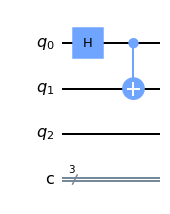

In [22]:
# Visualize the quantum circuit
circuit.draw()

After $q_0$ passes though the Hadamard gate, it becomes a superposition of 0 and 1, recall:

$\psi_0 = \frac{1}{\sqrt{2}}|1> + \frac{1}{\sqrt{2}}|0>$

$q_1$ is in the well-defined state of $|0>$.

Hence, when combining the two qubits together via the CNOT gate, according to the truth table, we have a quantum state for the two qubits as follows:

$\psi_{0,1} = \frac{1}{\sqrt{2}}|11> + \frac{1}{\sqrt{2}}|00>$

What this means is that if $q_0$ is in state $|1>$, then $q_1$ must also be in state $|1>$. And if $q_0$ is in state $|0>$, then $q_1$ must also be in state $|0>$. The two qubits are no longer independent of each other. In terms of measurements, when we measure, say $q_0$, and find it in state $|1>$, then we can say with 100% certainty that $q_1$ must also be in state $|1>$. And it doesn't stop there, by addinng another qubit and connect it to the first qubit via another CNOT gate, we can get a quantum state of three qubits as follows:

$\psi_{0,1,2} = \frac{1}{\sqrt{2}}|111> + \frac{1}{\sqrt{2}}|000>$

The claim is that if we measure the three qubits, if one of them is in state $|1>$, then all of them are in state $|1>$. If one of them is in $|0>$, then all of them are in state $|0>$. Let's see if this is the case in the real quantum computer.

The circuit is as follows:


In [33]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])


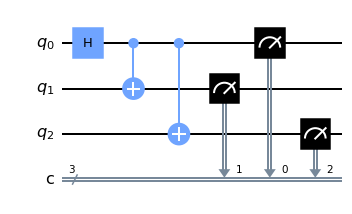

In [34]:
# Visualize the quantum circuit
circuit.draw()

The measurement units are organized a little weirdly, for some reason unknown. But it wouldn't affect our measurement results. Let's send it to the quantum computer and see what we get.

In [35]:
# Send to quantum computer and get counts
tic = time.time()
transpiled_circuits = transpile(circuit, quito)

# Shots represent the number of times a measurement is made
job_real = quito.run(transpiled_circuits, shots=8192)
job_monitor(job_real)
result_real = job_real.result()
toc = time.time()

print(toc-tic)

Job Status: job has successfully run
1088.510080575943


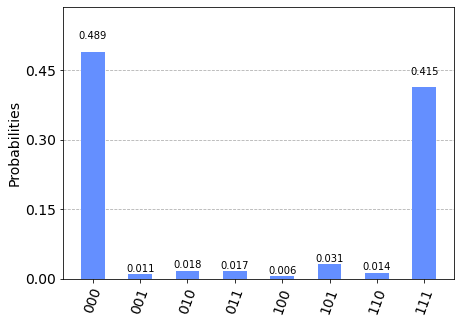

In [36]:
counts = result_real.get_counts()
plot_histogram (counts)

The $|111>$ and $|000>$ states are the most probable, meaning all three qubits have the same state. The probabilities are not ideally 50% due to the random nature of the quantum system. However, we also see other possible states, such as $|110>$ and $|011>$ etc.. These are not due to the randomness of the quantum system, ideally they should not be present. So what could cause them? One possible reason is noise, the IBM quantum computer is not completely free of environmental noise even though it sits in a low-temperature superconducting environment, and this could affect the interactions between the qubits.

The probability of noise interfering with our result is relatively small. So consider the ideal case where all three qubits form the following quantum state:

$\psi_{0,1,2} = \frac{1}{\sqrt{2}}|111> + \frac{1}{\sqrt{2}}|000>$


The state of each qubit is not independent. This phenomenon is called quantum entanglement. When two particles or qubits are entangled, they form what's called the Bell state, such as our $\psi_{0,1}$:

$\psi_{0,1} = \frac{1}{\sqrt{2}}|11> + \frac{1}{\sqrt{2}}|00>$

When more than two particles or qubits are entangled, the state is called Greenberger–Horne–Zeilinger state, or in short, GHZ state. Such as our $\psi_{0,1,2}$ state here. 

What is special about these states is to consider the following Gedanken experiment: imagine we have three particles entangled, and then they moved apart (it will be difficult to imagine three qubits moving apart since they're parts of a quantum computer). After a long time, one particle may still be on earth in our laboratory, while the other two may have traveled to other planets or even galaxies (remember this is purely Gedanken, so assuming nothing else happened to these three particles, they're still entangled, only they're far apart). The three particles are still entangled, so if we measure the state of the particle on earth, and find it to be in state $|1>$, this means, we are in this state $|111>$ for the three particles, and therefore both particles far far away should also be in $|1>$ if someone were to measure them. 

So far, this seems fine, maybe all three particles initially started off in $|1>$ when they moved apart. And they remained as such. But that is not the case! We could equally likely have measured the particle on earth to be in state $|0>$, remeber the result we get from our quantum computer, $|000>$ is another possible state for our three particles. And if we do measure particle on earth to be in state $|0>$, then both particles far far away are also in state $|0>$. But how do those two particles know what we measured on earth? This is called the EPR paradox, named after Albert Einstein, Boris Podolsky and Nathan Rosen, who first came up with this thought experiment.[6] How is one question, an even bigger question is the following. Suppose there is an alien experimenter measuring one of the two particles at the same time as we measure the particle on earth, once we measured $|0>$ state for our particle, the alien experimenter must also measure $|0>$ state for their particle, since there are only $|111>$ or $|000>$ states possible for these three particles. The influence of our measurement seems to travel instantaneously to the other two particles, and Einstein knows this disobeys his special relativity where no information can travel faster than the speed of light. 

It turns out the influence of our measurement is not like the typical information we send out, in other words we can not tell the alien experimenter what we measured with faster-than-light speed. So special relativity is safe. But the influence of our experiment does travel faster than the speed of light and instantaneously affects the outcome of the alien experimenter's result. John Bell first came up with a quantitative way to test this phenomenon in his famous Bell's Inequalities,[7] and it has since been proven experimentally by researcher such as Alain Aspect.[8]

So what does this mean for our quantum computer? Can we use this quantum influence to somehow make information travel faster than the speed of light? The answer unfortunately is no, but it hasn't stop people from thinking about it. Meanwhile, more down to earth, the entanglement phenomenon can be applied to quantum cryptography (the art of transmitting information securely), and superdense coding (transmitting the information of two binary bits with one qubit). All these topics are fascinating but are beyond the scope of this report. Needless to say, people are still trying to think of new ways to use this quantum weirdness to our advantage.




### Reference

[1] https://www.intel.com/content/www/us/en/silicon-innovations/intel-14nm-technology.html

[2] "Maximization of Extractable Randomness in a Quantum Random-Number Generator", J. Y. Haw, et. al., Phys. Rev. Applied 3, 054004 (2015)

[3] https://www.tutorialspoint.com/computer_logical_organization/logic_gates.htm

[4] https://en.wikipedia.org/wiki/Controlled_NOT_gate

[5] "Silicon CMOS architecture for a spin-based quantum computer", M. Veldhorst, et. al., Nature Communications volume 8, Article number: 1766 (2017)

[6] "Can Quantum-Mechanical Description of Physical Reality Be Considered Complete?" A. Einstein, B. Podolsky, and N. Rosen, Phys. Rev. 47, 777 – Published 15 May 1935

[7] "On the Einstein Podolsky Rosen paradox", J. S. Bell, Physics Physique Fizika 1, 195 – Published 1 November 1964

[8] "Experimental Realization of Einstein-Podolsky-Rosen-Bohm Gedankenexperiment: A New Violation of Bell's Inequalities" Alain Aspect, et. al., Phys. Rev. Lett. 49, 91 – Published 12 July 1982
